In [2]:
!pip install opencv-python-headless

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/40.1 MB ? eta -:--:--
    --------------------------------------- 0.8/40.1 MB 5.0 MB/s eta 0:00:08
   -- ------------------------------------- 2.6/40.1 MB 7.6 MB/s eta 0:00:05
   ---- ----------------------------------- 4.7/40.1 MB 8.8 MB/s eta 0:00:05
   ------- -------------------------------- 7.9/40.1 MB 10.6 MB/s eta 0:00:04
   ------------ --------------------------- 12.1/40.1 MB 12.8 MB/s eta 0:00:03
   ---------------- ----------------------- 16.5/40.1 MB 14.6 MB/s eta 0:00:02
   ------------------- -------------------- 19.9/40.1 MB 15.0 MB/s eta 0:00:02
   ------------------------- -------------- 25.4/40.1 MB 16.5 MB/s eta 0:00:01
   ----------------------------- ---------- 29.9/40.1 MB 17.2 MB/s eta 0:00:01
   ----------------------------------- ---- 35.4/40.1 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------  39.8/40.1 MB 18.8 MB/s et

In [1]:
import cv2
print(cv2.__version__)

4.13.0


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# Path to images folder
image_folder = "image"

# Get all image files
image_files = os.listdir(image_folder)

for file in image_files:
    
    print("Processing:", file)
    
    # Full path
    img_path = os.path.join(image_folder, file)
    
    # Load image
    image = cv2.imread(img_path)
    
    if image is None:
        print("Could not load:", file)
        continue

Processing: building.jpg
Processing: nature.jpg
Processing: road.jpg


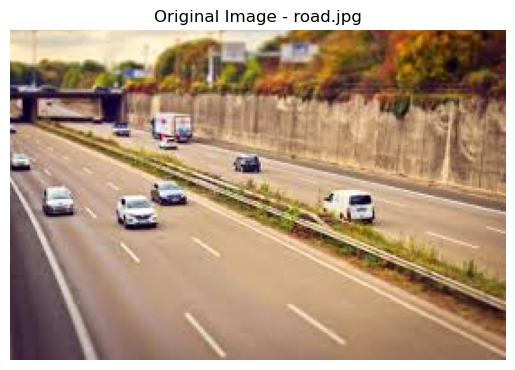

In [6]:
# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
plt.imshow(image_rgb)
plt.title(f"Original Image - {file}")
plt.axis("off")
plt.show()

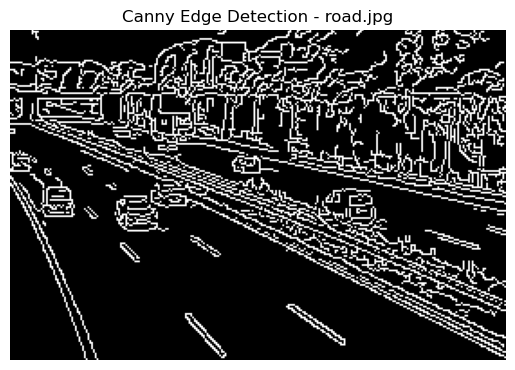

In [8]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
# Apply Canny
edges = cv2.Canny(gray, 100, 200)
    
plt.imshow(edges, cmap='gray')
plt.title(f"Canny Edge Detection - {file}")
plt.axis("off")
plt.show()

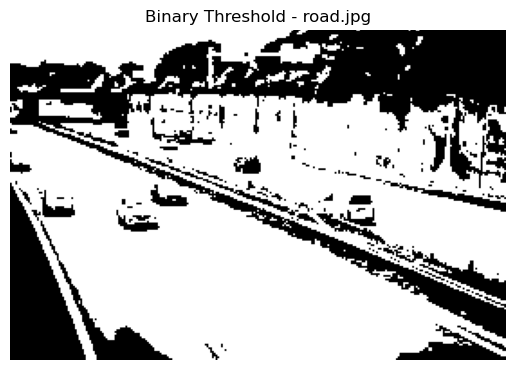

In [9]:
# Binary Threshold
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
plt.imshow(thresh, cmap='gray')
plt.title(f"Binary Threshold - {file}")
plt.axis("off")
plt.show()
    
# Adaptive Threshold
adaptive_thresh = cv2.adaptiveThreshold(
    gray,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11,
    2
)

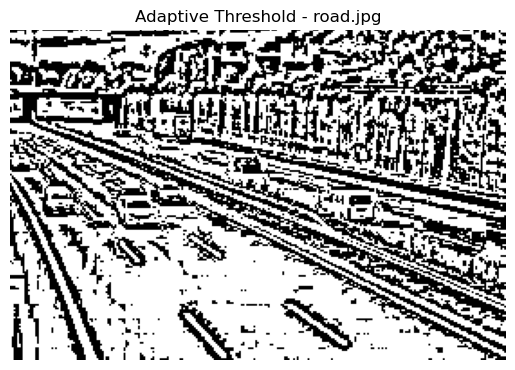

In [11]:
plt.imshow(adaptive_thresh, cmap='gray')
plt.title(f"Adaptive Threshold - {file}")
plt.axis("off")
plt.show()

In [12]:
#IMAGE AUGMENTATION

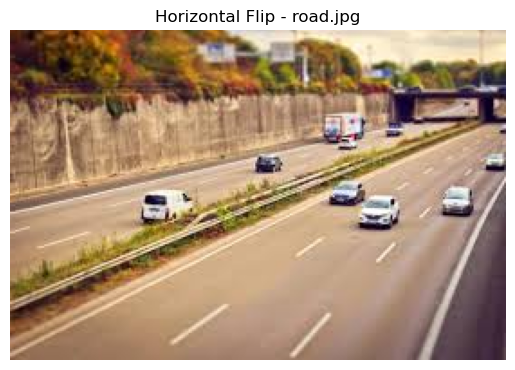

In [14]:
# A. Flip
flip_horizontal = cv2.flip(image_rgb, 1)
    
plt.imshow(flip_horizontal)
plt.title(f"Horizontal Flip - {file}")
plt.axis("off")
plt.show()

In [15]:
# B. Rotate
height, width = image_rgb.shape[:2]
center = (width // 2, height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image_rgb, rotation_matrix, (width, height))

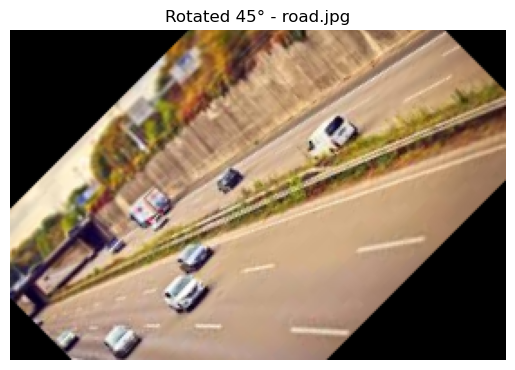

In [16]:
plt.imshow(rotated)
plt.title(f"Rotated 45° - {file}")
plt.axis("off")
plt.show()

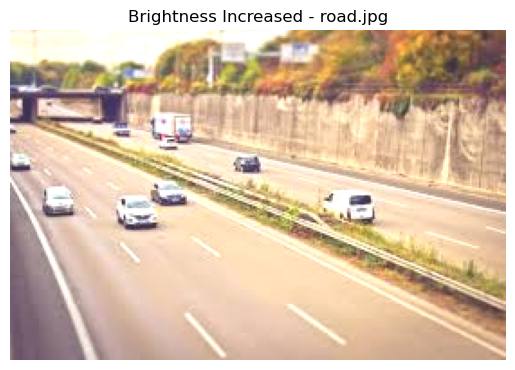

In [17]:
# C. Brightness Adjustment
bright_image = cv2.convertScaleAbs(image_rgb, alpha=1, beta=50)
    
plt.imshow(bright_image)
plt.title(f"Brightness Increased - {file}")
plt.axis("off")
plt.show()

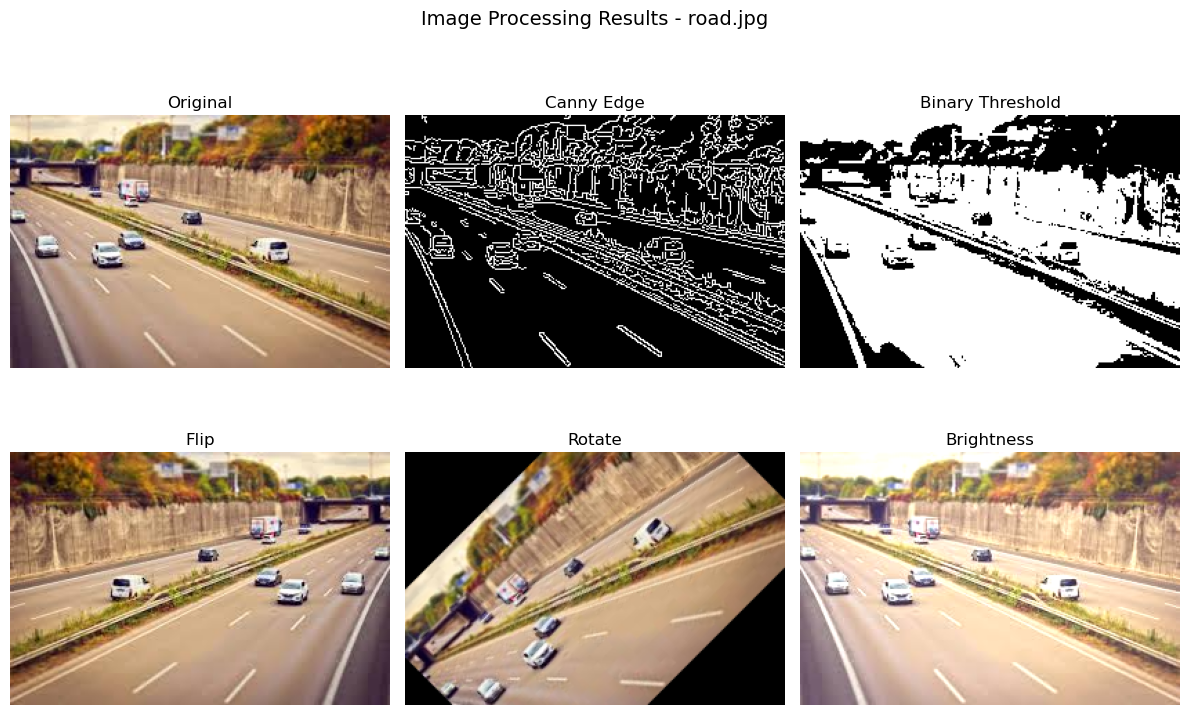

In [18]:
#SHOW ALL RESULTS TOGETHER
    
    
plt.figure(figsize=(12,8))
    
plt.subplot(2,3,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")
    
plt.subplot(2,3,2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge")
plt.axis("off")
    
plt.subplot(2,3,3)
plt.imshow(thresh, cmap='gray')
plt.title("Binary Threshold")
plt.axis("off")
    
plt.subplot(2,3,4)
plt.imshow(flip_horizontal)
plt.title("Flip")
plt.axis("off")
    
plt.subplot(2,3,5)
plt.imshow(rotated)
plt.title("Rotate")
plt.axis("off")
    
plt.subplot(2,3,6)
plt.imshow(bright_image)
plt.title("Brightness")
plt.axis("off")
    
plt.suptitle(f"Image Processing Results - {file}", fontsize=14)
plt.tight_layout()
plt.show()
